In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import random

import librosa
import math

In [ ]:
# path to json
DATA_PATH = "/content/drive/MyDrive/datasets/Data/genres_original/data_10.json"

In [ ]:

def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y


In [ ]:
# load data
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [ ]:

X.shape


(9996, 130, 13)

In [ ]:
# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Simple ANN


In [ ]:
# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])


In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 1690)              0         
                                                                 
 dense_12 (Dense)            (None, 512)               865792    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 64)                16448     
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)


Epoch 1/50
219/219 [==============================] - 3s 12ms/step - loss: 6.8499 - accuracy: 0.2918 - val_loss: 2.1090 - val_accuracy: 0.3128
Epoch 2/50
219/219 [==============================] - 2s 11ms/step - loss: 1.9207 - accuracy: 0.3440 - val_loss: 1.9392 - val_accuracy: 0.3531
Epoch 3/50
219/219 [==============================] - 2s 11ms/step - loss: 1.7392 - accuracy: 0.3846 - val_loss: 1.9027 - val_accuracy: 0.3758
Epoch 4/50
219/219 [==============================] - 3s 15ms/step - loss: 1.6259 - accuracy: 0.4112 - val_loss: 1.8801 - val_accuracy: 0.3875
Epoch 5/50
219/219 [==============================] - 2s 11ms/step - loss: 1.5547 - accuracy: 0.4290 - val_loss: 1.8240 - val_accuracy: 0.4018
Epoch 6/50
219/219 [==============================] - 2s 11ms/step - loss: 1.5095 - accuracy: 0.4493 - val_loss: 1.8251 - val_accuracy: 0.4095
Epoch 7/50
219/219 [==============================] - 2s 11ms/step - loss: 1.4324 - accuracy: 0.4813 - val_loss: 1.8256 - val_accuracy: 0.4281

In [ ]:

def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    fig.tight_layout()
    #plt.show()

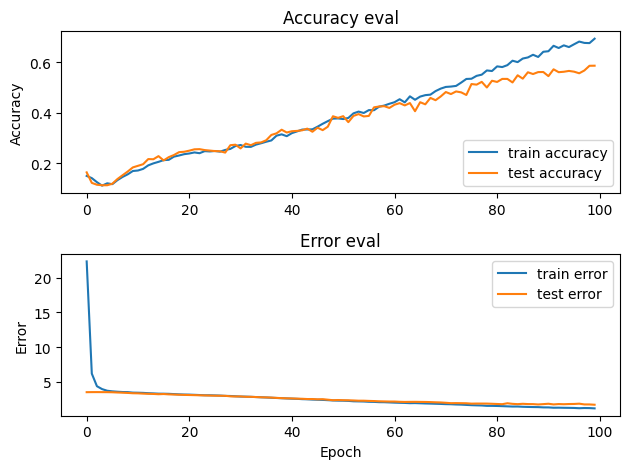

In [ ]:
# plot accuracy and error as a function of the epochs
plot_history(history)



Managing overfitting

In [ ]:
# build network topology
model_regularized = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# train model
history = model_regularized.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
219/219 [==============================] - 4s 7ms/step - loss: 24.2487 - accuracy: 0.1586 - val_loss: 3.6041 - val_accuracy: 0.1864
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 6.6921 - accuracy: 0.1538 - val_loss: 3.4833 - val_accuracy: 0.1350
Epoch 3/100
219/219 [==============================] - 1s 5ms/step - loss: 4.5700 - accuracy: 0.1319 - val_loss: 3.4898 - val_accuracy: 0.1267
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 4.0203 - accuracy: 0.1353 - val_loss: 3.4824 - val_accuracy: 0.1294
Epoch 5/100
219/219 [==============================] - 1s 5ms/step - loss: 3.7811 - accuracy: 0.1389 - val_loss: 3.4478 - val_accuracy: 0.1464
Epoch 6/100
219/219 [==============================] - 1s 5ms/step - loss: 3.6541 - accuracy: 0.1448 - val_loss: 3.4536 - val_accuracy: 0.1384
Epoch 7/100
219/219 [==============================] - 1s 5ms/step - loss: 3.5806 - accuracy: 0.1506 - val_loss: 3.4356 - val_accuracy: 0.150

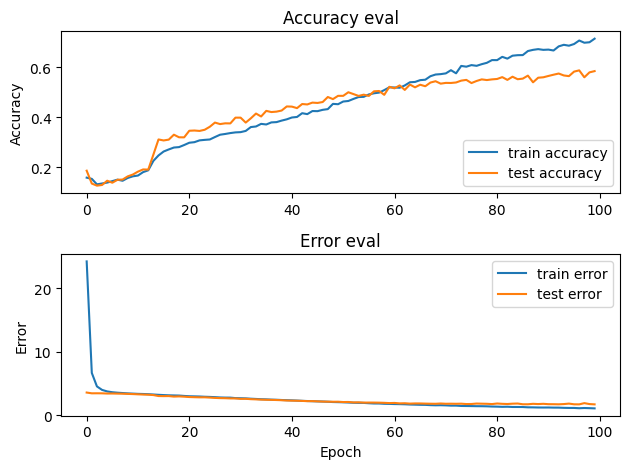

In [ ]:
# plot accuracy and error as a function of the epochs
plot_history(history)
plt.savefig("Model-1 performance")

Convolutional neural network

In [ ]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
X_train.shape


(5997, 130, 13, 1)

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)


In [ ]:
# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))


In [ ]:

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model_cnn.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 6, 32)        0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 64, 6, 32)        128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 31, 2, 32)        0         
 g2D)                                                            
                                                      

In [ ]:

# train model
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

Epoch 1/50
188/188 [==============================] - 4s 6ms/step - loss: 2.2789 - accuracy: 0.2516 - val_loss: 1.8013 - val_accuracy: 0.3627
Epoch 2/50
188/188 [==============================] - 1s 5ms/step - loss: 1.8280 - accuracy: 0.3615 - val_loss: 1.5513 - val_accuracy: 0.4273
Epoch 3/50
188/188 [==============================] - 1s 6ms/step - loss: 1.6459 - accuracy: 0.4187 - val_loss: 1.4336 - val_accuracy: 0.4827
Epoch 4/50
188/188 [==============================] - 1s 7ms/step - loss: 1.5323 - accuracy: 0.4651 - val_loss: 1.3633 - val_accuracy: 0.4940
Epoch 5/50
188/188 [==============================] - 1s 7ms/step - loss: 1.4347 - accuracy: 0.4944 - val_loss: 1.2847 - val_accuracy: 0.5273
Epoch 6/50
188/188 [==============================] - 1s 5ms/step - loss: 1.3737 - accuracy: 0.5084 - val_loss: 1.2346 - val_accuracy: 0.5553
Epoch 7/50
188/188 [==============================] - 1s 5ms/step - loss: 1.3119 - accuracy: 0.5306 - val_loss: 1.1901 - val_accuracy: 0.5580
Epoch 

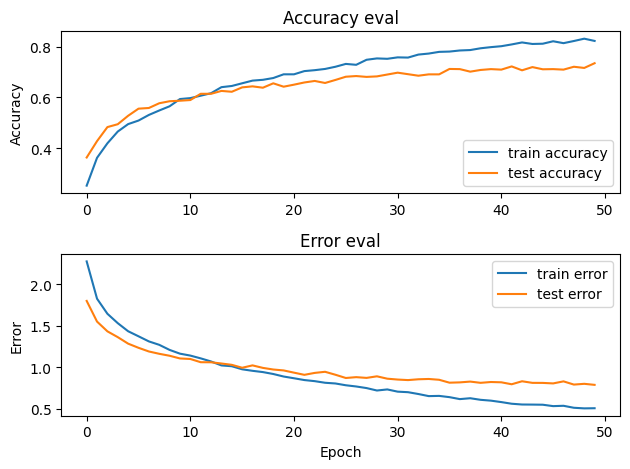

In [ ]:
# plot accuracy and error as a function of the epochs
plot_history(history)
plt.savefig("Model-2 plot")

In [ ]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 0s - loss: 0.7832 - accuracy: 0.7395 - 187ms/epoch - 2ms/step

Test accuracy: 0.7394958138465881


In [ ]:
model_cnn.save("Music_Genre_10_CNN")

In [ ]:
model_cnn.save("Music_Genre_10_CNN.h5")

In [ ]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("Music_Genre_10_CNN.h5")

Prediction on Test Set


In [ ]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

In [ ]:
X_to_predict.shape


(130, 13, 1)

In [ ]:

print("Real Genre:", y_to_predict)


Real Genre: 4


In [ ]:
# add a dimension to input data for sample - model.predict() expects a 4d array in this case
X_to_predict = X_to_predict[np.newaxis, ...] # array shape (1, 130, 13, 1)


In [ ]:
X_to_predict.shape


(1, 130, 13, 1)

In [ ]:
# perform prediction
prediction = model_cnn.predict(X_to_predict)

1/1 [==============================] - 0s 295ms/step


In [ ]:
# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))


Predicted Genre: 4


In [ ]:
# pick a sample to predict from the test set
X_to_predict = X_test[50]
y_to_predict = y_test[50]

print("Real Genre:", y_to_predict)

X_to_predict = X_to_predict[np.newaxis, ...]

prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Real Genre: 8
1/1 [==============================] - 0s 25ms/step
Predicted Genre: 4


In [ ]:
len(X_test)


2499

In [ ]:
for n in range(10):

  i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))



Real Genre: 9
1/1 [==============================] - 0s 27ms/step
Predicted Genre: 3

Real Genre: 4
1/1 [==============================] - 0s 28ms/step
Predicted Genre: 4

Real Genre: 2
1/1 [==============================] - 0s 36ms/step
Predicted Genre: 2

Real Genre: 0
1/1 [==============================] - 0s 41ms/step
Predicted Genre: 0

Real Genre: 2
1/1 [==============================] - 0s 41ms/step
Predicted Genre: 5

Real Genre: 1
1/1 [==============================] - 0s 40ms/step
Predicted Genre: 1

Real Genre: 0
1/1 [==============================] - 0s 28ms/step
Predicted Genre: 0

Real Genre: 8
1/1 [==============================] - 0s 25ms/step
Predicted Genre: 8

Real Genre: 5
1/1 [==============================] - 0s 27ms/step
Predicted Genre: 5

Real Genre: 1
1/1 [==============================] - 0s 28ms/step
Predicted Genre: 1


Prediction on new Songs

In [ ]:

# Audio files pre-processing
def process_input(audio_file, track_duration):

  SAMPLE_RATE = 22050
  NUM_MFCC = 13
  N_FTT=2048
  HOP_LENGTH=512
  TRACK_DURATION = track_duration # measured in seconds
  SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
  NUM_SEGMENTS = 10

  samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

  signal, sample_rate = librosa.load(audio_file, sr=SAMPLE_RATE)

  for d in range(10):

    # calculate start and finish sample for current segment
    start = samples_per_segment * d
    finish = start + samples_per_segment

    # extract mfcc
    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)
    mfcc = mfcc.T

    return mfcc

In [ ]:
genre_dict = {0:"hiphop",1:"country",2:"jazz",3:"classical",4:"metal",5:"pop",6:"rock",7:"blues",8:"reggae",9:"disco"}


In [ ]:
new_input_mfcc = process_input("/content/1st Contact - Almost like the Blues.mp3", 30)

In [ ]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 130, 13, 1)

In [ ]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])


1/1 [==============================] - 0s 25ms/step
Predicted Genre: pop


In [ ]:
new_input_mfcc = process_input("/content/1st Contact - Almost like the Blues.mp3", 30)


In [ ]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape


(1, 130, 13, 1)

In [ ]:

prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])


1/1 [==============================] - 0s 27ms/step
Predicted Genre: pop


In [ ]:
# build the CNN
model_cnn2 = keras.Sequential()

# 1st conv layer
model_cnn2.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
#model_cnn2.add(keras.layers.MaxPooling2D(2, padding='same'))
#model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn2.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
#model_cnn2.add(keras.layers.MaxPooling2D(2, padding='same'))
#model_cnn.add(keras.layers.BatchNormalization())
model_cnn2.add(keras.layers.Dropout(0.3))

# 3rd conv layer
model_cnn2.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
#model_cnn2.add(keras.layers.MaxPooling2D(2, padding='same'))
#model_cnn.add(keras.layers.BatchNormalization())
model_cnn2.add(keras.layers.Dropout(0.3))


model_cnn2.add(keras.layers.GlobalAveragePooling2D())

# flatten output and feed it into dense layer
#model_cnn.add(keras.layers.Flatten())
model_cnn2.add(keras.layers.Dense(512, activation='relu'))
#model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn2.add(keras.layers.Dense(10, activation='softmax'))


In [ ]:

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.001)
model_cnn2.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model_cnn2.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 128, 11, 32)       320       
                                                                 
 conv2d_16 (Conv2D)          (None, 126, 9, 128)       36992     
                                                                 
 dropout_10 (Dropout)        (None, 126, 9, 128)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 124, 7, 128)       147584    
                                                                 
 dropout_11 (Dropout)        (None, 124, 7, 128)       0         
                                                                 
 global_average_pooling2d_5   (None, 128)              0         
 (GlobalAveragePooling2D)                                        
                                                      

In [ ]:

# train model
history = model_cnn2.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=40, verbose=2)

Epoch 1/40
188/188 - 4s - loss: 1.6914 - accuracy: 0.3772 - val_loss: 1.4300 - val_accuracy: 0.4833 - 4s/epoch - 24ms/step
Epoch 2/40
188/188 - 2s - loss: 1.3019 - accuracy: 0.5304 - val_loss: 1.3344 - val_accuracy: 0.5307 - 2s/epoch - 13ms/step
Epoch 3/40
188/188 - 3s - loss: 1.1633 - accuracy: 0.5760 - val_loss: 1.0873 - val_accuracy: 0.6087 - 3s/epoch - 14ms/step
Epoch 4/40
188/188 - 3s - loss: 1.0079 - accuracy: 0.6453 - val_loss: 1.0113 - val_accuracy: 0.6400 - 3s/epoch - 13ms/step
Epoch 5/40
188/188 - 2s - loss: 0.8894 - accuracy: 0.6865 - val_loss: 0.8820 - val_accuracy: 0.6747 - 2s/epoch - 13ms/step
Epoch 6/40
188/188 - 2s - loss: 0.7861 - accuracy: 0.7310 - val_loss: 0.7809 - val_accuracy: 0.7227 - 2s/epoch - 13ms/step
Epoch 7/40
188/188 - 3s - loss: 0.7175 - accuracy: 0.7454 - val_loss: 0.8224 - val_accuracy: 0.7220 - 3s/epoch - 13ms/step
Epoch 8/40
188/188 - 3s - loss: 0.6614 - accuracy: 0.7664 - val_loss: 0.6781 - val_accuracy: 0.7600 - 3s/epoch - 13ms/step
Epoch 9/40
188/1

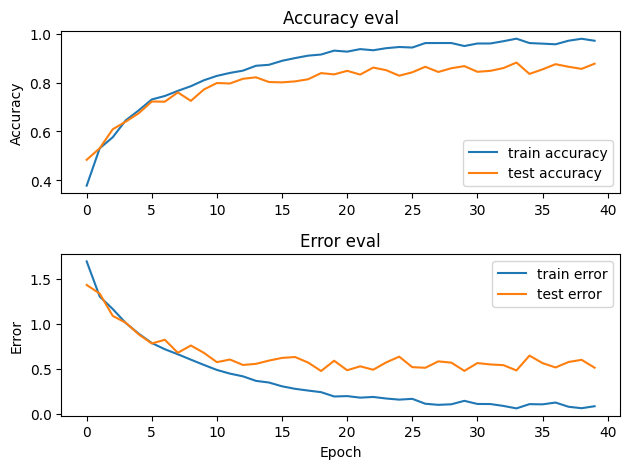

In [ ]:
# plot accuracy and error as a function of the epochs
plot_history(history)
plt.savefig("Model-3 plot")

In [ ]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn2.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 0s - loss: 0.5694 - accuracy: 0.8667 - 354ms/epoch - 4ms/step

Test accuracy: 0.866746723651886
